# Intro to Linear Regression

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tutorial_tools as tools
from importlib import reload

from sklearn.linear_model import LinearRegression

# Linear Regression at a Glance

### What is is ?
When it comes to building models, the main idea is that you want some way to predict a **target variable** (e.g : price of a house), based on its **features** (e.g. Square footage, Number of bathrooms, etc...).  Linear Regression, assumes a linear relationship between the target and its features, in the form : 

$$
y = \beta_0 + \sum_{j=1}^{N} \beta_jx_j
$$

Where :
- $y$ is the target variable
- $x_j$ denotes some feature 
- $\beta_0$ is a bias term, or y-intercept of the line. 
- $\beta_j$ is a weight associated to that feature, or the slope of the line.
- $N$ is the number of features. 


We make a distinction between two types of Linear Regression : 

1) **Simple Linear Regression** : There is only one feature<br>
2) **Multiple Linear Regression** : There is more than one feature<br>

When given a bunch of data, it will never follow a line perfectly.  The idea behind Linear Regression is to find the optimal parameters (weights, and bias term) that give the best predictions for you data. But before going into those detail... 


### What is it good for?

Linear Regression is a simple model, often too simple, but it does have its uses :<br>

- Due to its simplicity, it makes for a great introduction to building models to predict data (hence why we are starting here).
- It has an analytical solution, which means you simply have to perform a few calculations to get the best Linear Regression model possible. 
- Although it slows down when dealing with a very large number features, it is still computationally efficient. When dealing with large datasets, it is sometimes preferable to optimize efficiency over accuracy of a model.
- Finally, linear regression is easy to interpret, and visualize, so it will provide us with good analogies as things get more complex. <br>

## Linear Functions

Before going any further, let us review linear functions, nad relations between two variables.
<br>

As we just mentioned, Linear Regression, assumes that there is a ... **linear relation** between the target varialbe (what we want to predict), and its features (what we use to predict).  For simple linear regression, a linear relation means that it can be expressed by a mathematical function that looks something like this : 
<br>

$$
y = \beta_0 + \beta_1x
$$

Which draws out a line when plotted on a graph (hence the name), and 
<br>

- $y$ is the value we are predicting, associated to an observation $x$. 
- $\beta_0$ is a bias term, or the intercept of the line (think : what value do we have when $x=0$)
- $\beta_1$ is the slope of the line (think: by how much does $y$ change if we change $x$ by 1). 

*Note : we refer to $\beta_0$, and $\beta_1$ as **parameters** of the model. *

To visualize this suppose we measured a Temperature, $C$, in degrees Celcius, but we now want to express it as $F$, its corresponding temperature in degrees Fahrenheit.  We can make the conversion using the following linear function : 

$$
F = 32 + \frac{9}{5}C
$$

If we plot the relationship with $-5 \le C \le 100$, we have the following graph : 

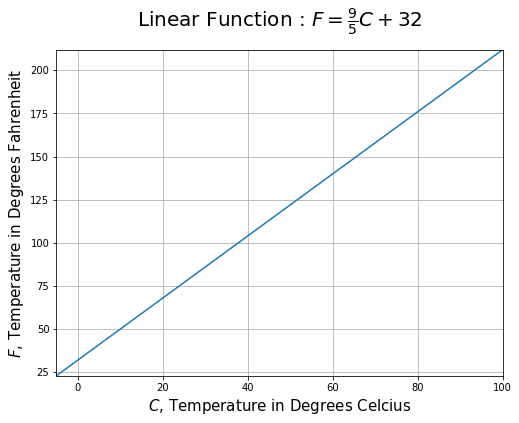

In [2]:
tools.temperature_conversion_plot()

As promised, we see a line!

If we generalize to the previous notation, we have : 
<br>

- $y$        $\rightarrow F$
- $x$        $\rightarrow C$
- $\beta_0$  $\rightarrow 32$
- $\beta_1$  $\rightarrow \frac{9}{5}$


So the intercept, $\beta_0$ is 32, which makes sense since $0^{\circ}$C, or $32^{\circ}$F, is the temperature at which water freezes.  The rate of change of $F$ with respect to $C$, or the slope of the line, is $9/5$.  

## Simple Linear Regression 

Now, **when building a model**, you do not know the parameters from the start, and you will never have a line that predicts the exact $y$ for a given $x$.  Instead you will have some data, which undoubtedly has randomness associated to it, and it will be your job to figure out what parameters give the best predictions for the model.  So if you think there is a linear relationship between your observations, you use **Linear Regression** to find the optimal $\beta_0$, and $\beta_1$. 
<br>

Let's pretend we do not know what the relationship between $^{\circ}C$, and $^{\circ}F$ is.  Instead, we have two thermometers one for each unit, and we want to figure out how they relate. Thermometers in hand, we start heating water in a boiler and measuring the temperature in both units as it it gets hotter. We meticulously record everything that was measured, and end up with a set of data, that might look like this :  

$$
C = [ 1.1, 5.2, 6.1, 10.3, 11.4, ... ]
$$

$$
F = [ 33.7, 41.0, 42.9, 51.1, 51.8, ...]
$$

By plotting the results, we see that although there is some uncertainty, the relationship is clearly linear :

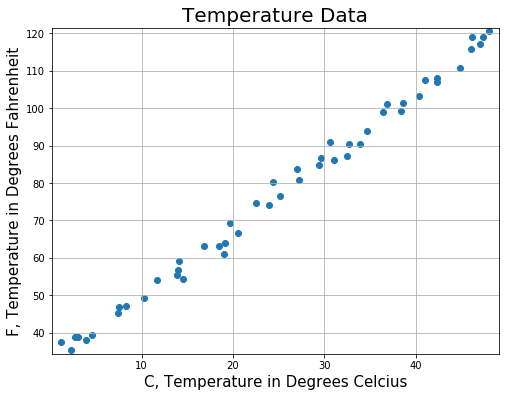

In [54]:
C, F = tools.temperature_data()

So, from these "measurements", we can clearly see that there is a linear relation between the two.  The problem is we do not know what that relation is exactly.  To know it we have to **fit the data** using linear regression.

### What it means to fit the data?

As we mentioned, fitting the data means finding the optimal slope, and intercept that will give us the best predictions for a given $x$, or more generally : **fitting a model means finding the parameters that give the best predictions**.  But what does it mean to have the best parameters?  and how do we find them? 

### What does it mean to have the best parameters?

Well, by this we mean the parameters that **minimize the error** in our model.  The error can be measured in a variety of ways, which we do not cover here, but the general idea is the lower the error the closer your predictions are to the *true values*.
<br>

For linear regression, there is a clear analytical solution that gives us the lowest possible error, this is not generally the case though.  For more complex models we typically use *Gradient Descent*, which iteratively adjusts the parameters so that the error decreases, until any further change makes it go up again. 

### How do we minimize the error in linear regression? 

This is not general for all models, but linear regression does have an analytical solution, meaning someone out there figured out an equation we can use to calculate it directly.  We call it the **Least Squares** method, and it looks like this :  
<br>
<br>
$$
\hat{\beta_1} = \frac{\sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

Where : 
<br>
<br>

- $\hat{\beta}_1$ is the value of $\beta_1$ (the slope) that minimizes the error
- $\bar{x}$ is the mean, or average, value of x
- $\bar{y}$ is the mean value of y
- $i$ denotes a particular row in the dataset. 
<br>

Since we assumed a linear relation, we can use basic algebra to find the best value for $\beta_0$, $\hat{\beta}_0$ (the intercept):
<br>
<br>
$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}
$$
<br>
Now let's do this with the previous data!  For this we will calculate things step by step to make sure we don't miss anything.  Also, so that we stay general we write things as x, and y instead of C and F. 

In [4]:
# Change notation
x = C
y = F

# residuals of ...
r_x = x - x.mean() # x
r_y = y - y.mean() # y
r_x2 = r_x*r_x     # x squared

beta1_hat = np.sum(r_x*r_y) / np.sum(r_x2) # best slope for the line

beta0_hat = y.mean() - beta1_hat*x.mean() # best intercept for the line

Which gives us : 

In [5]:
print('SLOPE     : beta1_hat = {}, Sanity check : 9/5 = {}'.format(beta1_hat, 9/5))
print('INTERCEPT : beta0_hat = {}'.format(beta0_hat))

SLOPE     : beta1_hat = 1.808880514575056, Sanity check : 9/5 = 1.8
INTERCEPT : beta0_hat = 31.890641805286663


It worked!
<br>

If you look at the code for making the data, you will see that it was engineered to follow the real function.  You may think this was cheating, and it was, but it also helps us point out that the parameters we found do not match the real ones exactly.  Because we introduced randomness into the data (which will ALWAYS be present in real data, or measurements), we are left with an approximation of the parameters.  If our assumption that there is a linear relationship between the two is true, and we had infinite data points, the parameters would converge towards the "true values".
<br>

We can now map an observed temperature, in Celcius, $C_i$ to its equivalent temperature $\hat{F}_i$ in Fahrenheit. 

$$
\hat{F_i} \approx 31.89 + 1.81C_i
$$

or more generally : 

$$
\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1 x_i
$$

where the $\hat{}$ (hat) denotes that it is a prediction, or evaluation from our model. 

### Checking the Model 

Because linear regression is simple to graph and interpret, we can check our model by plotting the linear equation we found on top of the data points : 

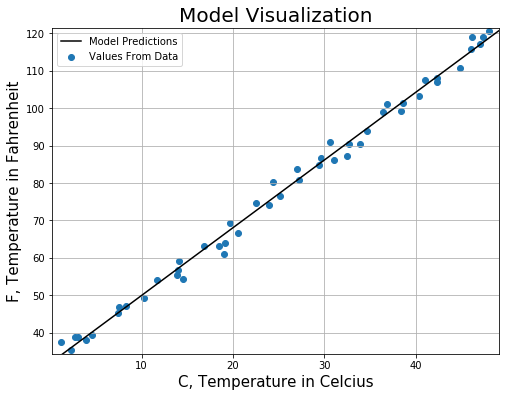

In [6]:
tools.plot_regression(C, F, beta0_hat, beta1_hat)

However, when models get more complicated we can not do this so simply.  A good approach to getting a visual representation of how well our model performs is to plot the **predicted values as a function of the observed values**. Or $\hat{y}$ as a function of $y$.  To do this, we need to actually calculate the temperature that our model gives us for each, $C_i$ in our dataset. 

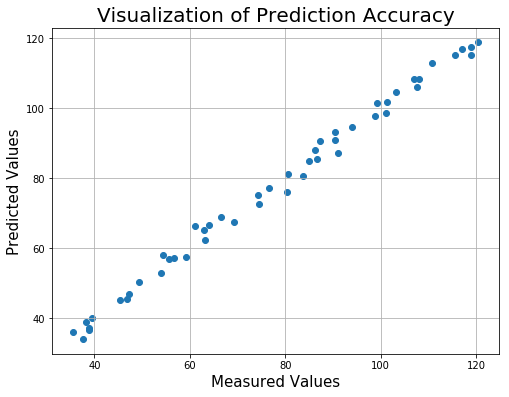

In [7]:
F_hat = [i*beta1_hat + beta0_hat for i in C] # Predicted values of F for a given C (or y for a given x)
tools.plot_predictions_vs_true(F, F_hat)

When plotting this, ideally we want to see a 1:1 correspondance between the predicted and observed values.  Of course this is never the case, but we make sure that there is as little scatter as possible, and that the line is straight.  

Give yourself a pat on the back if you've made it this far, you have just made your first model, and made sure that it was accurate!

## Multiple Linear Regression

So far, we have only been talking simple linear regression, using only a single feature.  In most cases however, a value will depend on more than one thing!  For example, the price of a house will depend on its size, but many other factors will come into play when the final offer is made (number of bedrooms, garden size, ...).  For cases like this, we can make a model that is a combination of linear functions : 

$$
y = \beta_0 + \sum_{j=1}^{N}\beta_j x_{j}
$$

Where $j$ denotes a certain feature in the data.
<br>

When finding the optmial parameters ($\beta$'s) for these types of models, we refer to it as **Multiple Linear Regression**. 
<br>

### Side Note : Matrices and Vectors, Features and Target

From now on, we will be dealing with data that has more that one feature / variable.  Because of this, it is easier to represent things using **matrices** and **vectors**.  If you are not familiar with such things, I suggests you  read this article : [Linear Algebra Cheat Sheet for Deep Learning](https://towardsdatascience.com/linear-algebra-cheat-sheet-for-deep-learning-cd67aba4526c)
<br>

Although there are different conventions, here we denote matrices by a bold capital letter (e.g. $\mathbf{X}$), and vectors by a bold lower case letter (e.g. $\mathbf{y}$).  Typically our data features are stored in a matrix, $\mathbf{X}$, and our target variable in a vector, $\mathbf{y}$.
<br>

For example, say we have two different houses, and we've recorded the *square footage* and *number of bedrooms* as our features, and we ultimately want to model the price of the house.  So our data is :  
<br>

|| Square Footage | Number of Bedrooms | Price |
|---|:---:|:---:|:---:|
|**House 1**| 1,200 | 3 |\$200,000|
|**House 2**| 2,000 | 4 |\$250,000|

From which we separate our features from our target variable.  The features go in a matrix, $\mathbf{X}$, and the target goes into a vector $\mathbf{y}$ :
<br>

$$
\mathbf{X} =  \begin{bmatrix}
1,200        & 3  \\
2,000        & 4  \\ 
\end{bmatrix}
$$
<br>

and,
$$
\mathbf{y} = \begin{bmatrix}
200,000 \\
250,000 \\
\end{bmatrix}
$$
<br>

### The Normal Equation

To find the optimal parameters of a multi linear regression model, we can generalize the Least Squares method, to any number of dimensions using the **Normal Equation** (Least Squares is simply the normal equation with only 1 feature, and 1 target) : <br>

$$
\hat{\beta} = \left(\mathbf{X}^T \mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}
$$

where, $\hat{\beta}$ now represents a vector containing all model parameters, or slopes of all the different lines. 
<br>

Now as soon as we add multiple dimensions, graphing for visualization can become tricky.  But basically, there is a surface in the $N$ dimensional space that the predictions will follow.  It helps to think that if you keep all features but 1 constant, there is a linear graph, as for the temperatures, that will represent how the target variable changes with respect to the given variable. 
<br>

### Example of Multiple Linear Regression

Since we have talked a little bit about housing, let us use the `boston` housing data set from scikit-learn to build a linear model . 

In [8]:
# Import Boston Housing Dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Assign data and target to X, and y
X = boston.data
y = boston.target

Thanks to the thorough work of the Scikit-learn community, the data set comes with a detailed description :

In [9]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

With this in hand, we can use the normal equation to calculate the best parameters for our model.  But first, we take note that the **bias term** does not appear directly in the normal equation.  We can implement one in the equations by adding an extra column of 1's to the $\mathbf{X}$ matrix, denoted $\mathbf{x_0}$.  Effectively, this will give us the $\beta_0$ parameter when done calculating. 

In [10]:
# Add Bias Column to the data
X = np.c_[np.ones(X.shape[0]), X]
print(X)

[[  1.00000000e+00   6.32000000e-03   1.80000000e+01 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  1.00000000e+00   2.73100000e-02   0.00000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  1.00000000e+00   2.72900000e-02   0.00000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  1.00000000e+00   6.07600000e-02   0.00000000e+00 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.00000000e+00   1.09590000e-01   0.00000000e+00 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  1.00000000e+00   4.74100000e-02   0.00000000e+00 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]


We are now ready to use the Normal Equation, and calculate our coefficients.  For clarity we do this operation step by step:

In [11]:
# Step by step calculation
beta = X.T.dot(X) # Transpose of X times X
beta = np.linalg.inv(beta) # Inverse
beta = beta.T.dot(X.T) # times Transpose of X

# The Actual value
beta = np.matmul(beta, y) # times y

print(beta)

[  3.64911033e+01  -1.07170557e-01   4.63952195e-02   2.08602395e-02
   2.68856140e+00  -1.77957587e+01   3.80475246e+00   7.51061703e-04
  -1.47575880e+00   3.05655038e-01  -1.23293463e-02  -9.53463555e-01
   9.39251272e-03  -5.25466633e-01]


Now that we have the beta coefficients, lets see how predicted results compared with the actual ones in the data set, as we did previously.  Recall, that predictions for a set $N$ observations is given by: 

$$
\hat{y}_i = \hat{\beta}_0 + \sum_{j=1}^{N}\hat{\beta}_i x_{i,j}
$$

or in matrix notation : 

$$
\mathbf{\hat{y}} = \mathbf{X}\hat{\beta}
$$

Note that the bias term is sometimes hidden in the $\hat{\beta}$, when this is the case, a columns of 1's is added to $\mathbf{X}$

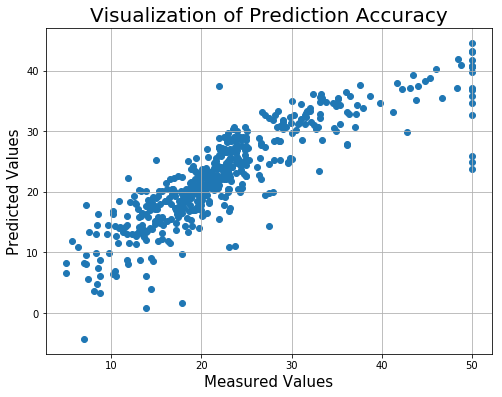

In [12]:
y_hat = X.dot(beta)
tools.plot_predictions_vs_true(y, y_hat)

From an actual data set, we see that the model kind of follows the general trend, but it is very scattered, and not too reliable.  If we want to get a quantitative measure of how precise our model is we can calculate the R-squared value, defined as such : 

$$
R^2 = 1 - \frac{\sum_i(y_i - \hat{y}_i)^2}{\sum_i(y_i - \bar{y})^2}
$$

Essentially it is a measure of how precise our model is, but we will discuss details of different metrics at another time.  Just know that the maximum $R^2$ value is one, which implies that our model always predicts the value perfectly (this is never the case).  For a score of zero, it means that we essentially predicted the mean value everytime.  Below 0 means we did worse than predicting the mean. 
<br>

Anyway, for our model we have : 

In [13]:
R2 = 1 - (np.sum((y - y_hat)**2) / (np.sum((y - y.mean())**2)))
print('R2 = ', R2)

R2 =  0.740607742865


Which isnt too shabby, all things considered. 

# Linear Regression With SciKit Learn

Although we can do linear regression analytically, Sckikit learn provides a wonderful library where we can do everything in a few steps, as follows : 

SciKit Learn R2: 0.7406077428649428


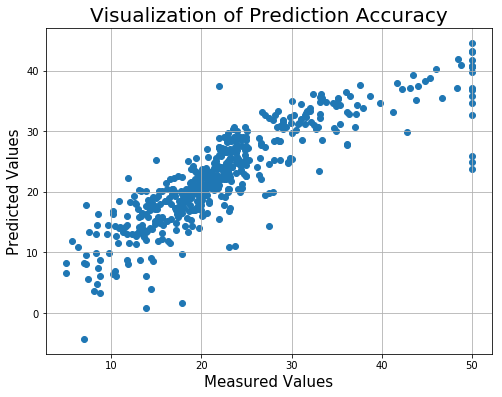

In [14]:
# Reload Boston Housing Data
X = boston.data
y = boston.target

# Instantiate LinearRegression object
model = LinearRegression()

# Fit the model (find the parameters)
model.fit(X,y)

# Make Predictions
y_hat = model.predict(X)

# Get a score from the predictions
r2 = model.score(X, y)

# Print Score
print('SciKit Learn R2: {}'.format(r2))

# Plot Results 
tools.plot_predictions_vs_true(y, y_hat)

In a few lines of code we can get pretty much the same model.  You will notice that the scores are a little different though.  This is because when minimizing the error in the models, scikit learn does not use the analytical method.  Instead it uses gradient descent to approximate the best fit.  For a small dataset like this, it is okay to do things analytically.  However, when facing hundreds of features is more efficient (computationally) to approximate the parameters. 

# Linear Regression With TensorFlow

If you have never seen TensorFlow, I do apologize, a dedicated intro is in the works.  In brief know that TensorFlow is a powerful library, with a steep learning curve.  The reason it is powerful is because it is fully customizable, and computationally efficient.  It's efficiency lies in the fact that it performs small calculations very quickly using your computer's GPU, optimizing it for parrallel computing.  Also be aware that with TensorFlow, you are first defining a *graph of operations*, then running a *session* where the operations are actually computed. 
<br>

Anyway, since we have seen Linear Regression in basic Python, and SciKit Learn, let's see what this would look like with TensorFlow, still using the boston housing Dataset.

R2 Score = 0.7406076846369123


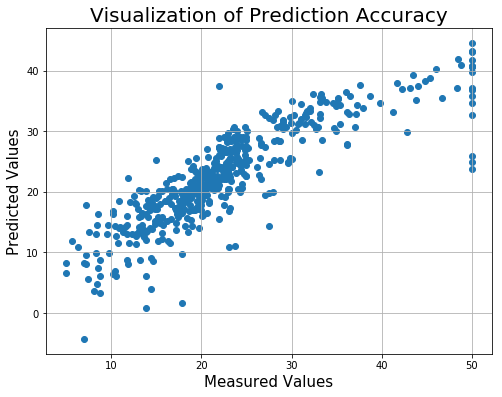

In [56]:
import tensorflow as tf # Import TF (I personally have some unsolved installation issues)

# Define X and y (include bias)
X = boston.data
X = np.c_[np.ones(X.shape[0]), X] # X with bias
y = boston.target.reshape(-1, 1)


# CREATE TF GRAPH
# Store these matrices as TensorFlow constants 
X_tf = tf.constant(X, dtype=tf.float32, name='X')
y_tf = tf.constant(y, dtype=tf.float32, name='y')

# Get transpose of X
XT = tf.transpose(X_tf)

# Calculate Beta values using the normal equation (step by step)
step1 = tf.matmul(XT, X_tf)
step2 = tf.matrix_inverse(step1)
step3 = tf.matmul(step2, XT)

# Beta VAluse and model predictions
beta        = tf.matmul(step3, y_tf)
predictions = tf.matmul(X_tf, beta)

# RUN TF SESSION TO EVALUATE BETA
with tf.Session() as sess:
    beta_values = beta.eval()
    y_hat = predictions.eval()

    
# PLOT RESULTS
tools.plot_predictions_vs_true(y, y_hat)
R2 = 1 - (np.sum((y - y_hat)**2) / (np.sum((y - y.mean())**2)))
print('R2 Score = {}'.format(R2))

## Final Thoughts

That sums it up for our tutorial on Linear Regression.  Although linear regression is not the most accurate model out there, it is very efficient and can be solved analytically.  It is sometimes used for its efficiency, but for more accurate predictions we need to go towards more complex models.  That being said, we will often refer to it since it provides simple analogies for things such as variance, bias, and the general idea behind making a model.  I hope you have enjoyed the first tutorial!